In [1]:
import mediapy as media
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


2. Read a video from your local file system into a numpy array.

In [2]:
os.path.isfile('./assets/eyes.mp4')
video = media.read_video('./assets/video1_category1.mp4')

2. Print the dimensions, type, and FPS (frames per second) of the video (i.e. the numpy array).

In [3]:
print('dimension:', video.shape, ', type: ', video.dtype, ', FPS:', video.metadata.fps)  

dimension: (225, 360, 640, 3) , type:  uint8 , FPS: 25.0


In [4]:
media.show_video(video)

In [5]:
first_frame = video[0]
second_frame = video[100]
# first_frame.arr

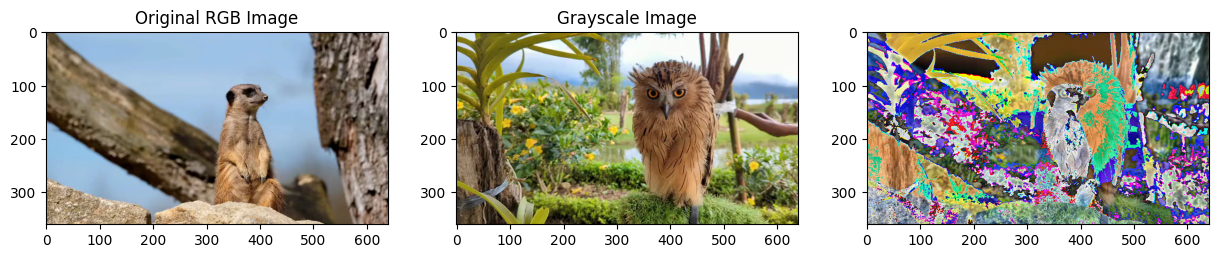

In [6]:


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(first_frame)
axes[0].set_title('Original RGB Image')

axes[1].imshow(second_frame)
axes[1].set_title('Grayscale Image')

axes[2].imshow(second_frame - first_frame)

3. Transform the video into a grayscale video.
4. Save the grayscale video to the disk (Note: for this you can probably loop over the frames as it may
be a bit harder to perform without any loops).

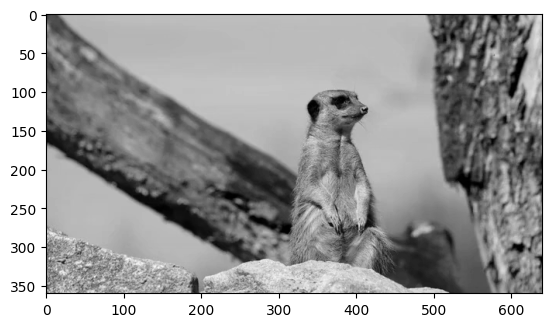

In [7]:
f = np.array(first_frame)
im = Image.fromarray(f).convert('L')
plt.imshow(im, cmap="gray")

In [8]:
def frame_to_grey_scale(frame) -> np.array:
    return np.array(Image.fromarray(np.array(frame)).convert('L'))
    

In [9]:
def write_grey_scale_video(video):
    with media.VideoWriter('./assets/grey_scale.mp4', video.metadata.shape, fps=video.metadata.fps) as writer:
        for frame in video:
            writer.add_image(frame_to_grey_scale(frame))            
            
write_grey_scale_video(video)
gray_video = media.read_video('./assets/grey_scale.mp4')

# g = frame_to_grey_scale(first_frame)
# g
# frame = Image.fromarray(first_frame)
# grey_frame = first_frame[0] .Transform('L')
# plt.imshow(grey_frame)


5. Save the grayscale video to the disk at half the original FPS.

6. Plot a figure showing a graph of the mean, sum, std, and max value per frame of the original video
and the grayscale video.

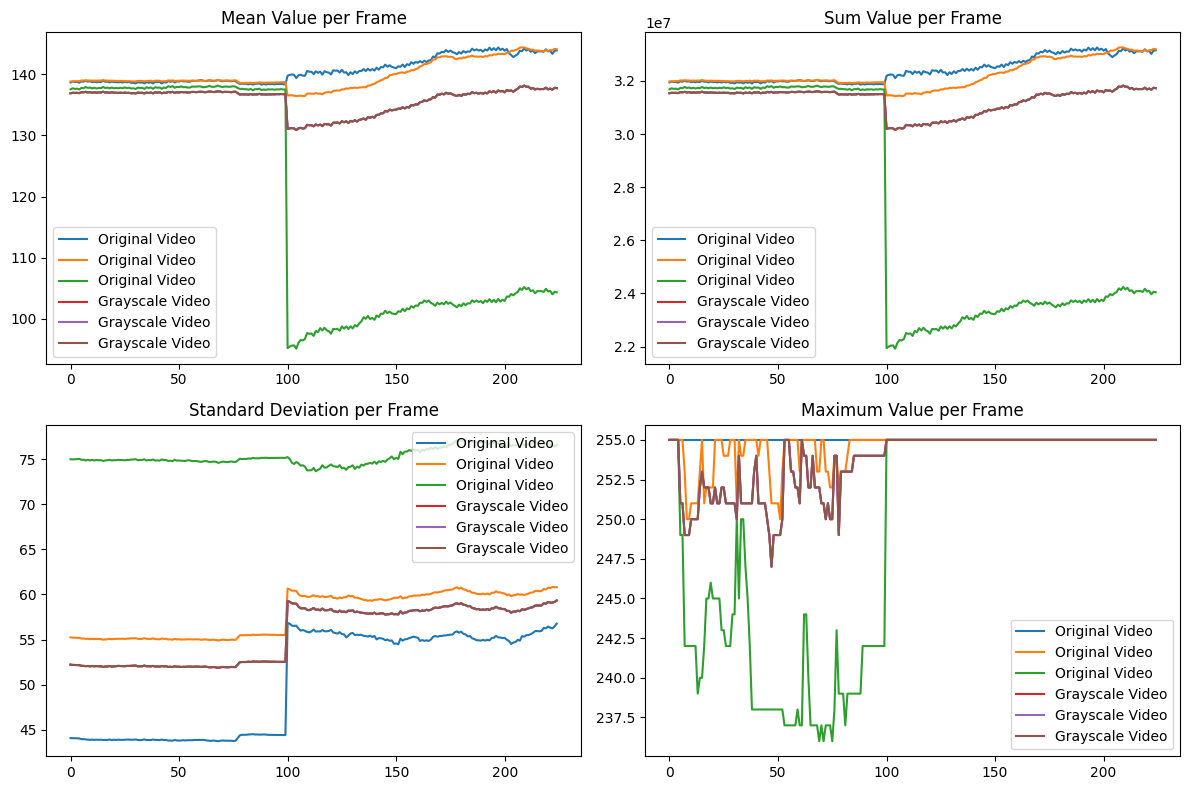

In [10]:
video_mean = video.mean(axis=(1,2))
video_sum = video.sum(axis=(1,2))
video_std = video.std(axis=(1,2))
video_max = video.max(axis=(1,2))

gray_video_mean = gray_video.mean(axis=(1, 2))
gray_video_sum = gray_video.sum(axis=(1, 2))
gray_video_std = gray_video.std(axis=(1, 2))
gray_video_max = gray_video.max(axis=(1, 2))

# Create a time axis (assuming one data point per frame)
time_axis = np.arange(len(video_mean))

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(time_axis, video_mean, label='Original Video')
plt.plot(time_axis, gray_video_mean, label='Grayscale Video')
plt.title('Mean Value per Frame')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(time_axis, video_sum, label='Original Video')
plt.plot(time_axis, gray_video_sum, label='Grayscale Video')
plt.title('Sum Value per Frame')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(time_axis, video_std, label='Original Video')
plt.plot(time_axis, gray_video_std, label='Grayscale Video')
plt.title('Standard Deviation per Frame')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(time_axis, video_max, label='Original Video')
plt.plot(time_axis, gray_video_max, label='Grayscale Video')
plt.title('Maximum Value per Frame')
plt.legend()

plt.tight_layout()
plt.show()


7. Save the figure to the disk.